# Study Case 01 EDA Data Property
**Kelompok 6**

1. Aina Grace Aritonang - 2106651263
2. Shafiyah Audiva Yasmin - 2106706880
3. Laras Kirana Anindita - 2106653035
4. Whitney - 2106700946

Objektif:
1. Kualitas data yang dimiliki perusahaan.
2. Apakah ada saran perbaikan data ke DE/DBA perusahaan agar RPPI menjadi data driven company yang unggul.
3. Dari data yang ada, apakah ada kecenderungan rumah disuatu kota lebih mahal/murah dibandingkan kota lain?
4. Dari data yang ada, apakah bisa dibuat rekomendasi sebaiknya RPPI membuat kantor cabang berikutnya di kota mana? Mengapa? (Asumsikan RPPI belum memiliki cabang di kota-kota yang disebutkan di data).
5. Rumah dengan karakteristik seperti apa yang paling banyak dijual?
6. Jika RPPI ingin melakukan investasi (max) Rp. 25 Milyar minggu besok, apakah dari data anda dapat memberikan rekomendasi rumah mana saja yang akan berpotensi menghasilkan keuntungan bagi perusahaan?
7. Dan yang terpenting, informasi berharga apa lagi yang bisa anda dapatkan dari data?

In [ ]:
#Import Module Phyton

import warnings; warnings.simplefilter('ignore')
import scipy, itertools, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np, gdown
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
plt.style.use('bmh'); sns.set()

In [ ]:
#Digunakan modul gdown untuk mengambil data dari Google Drive
!gdown 1ye-mU2rT7vYk5__xxzPbpHsxXR51FQVv

Downloading...
From: https://drive.google.com/uc?id=1ye-mU2rT7vYk5__xxzPbpHsxXR51FQVv
To: /content/Salinan dari Data-Property-Indonesia-Ganjil-2023.xlsx
100% 785k/785k [00:00<00:00, 116MB/s]


In [ ]:
#Import data

df_A=pd.read_excel('/content/Salinan dari Data-Property-Indonesia-Ganjil-2023.xlsx', sheet_name='Bogor')
df_B=pd.read_excel('/content/Salinan dari Data-Property-Indonesia-Ganjil-2023.xlsx', sheet_name='Lampung - Sumatera selatan')
df_C=pd.read_excel('/content/Salinan dari Data-Property-Indonesia-Ganjil-2023.xlsx', sheet_name='Semarang')
df_D=pd.read_excel('/content/Salinan dari Data-Property-Indonesia-Ganjil-2023.xlsx', sheet_name='Kalimantan (All)')
df_E=pd.read_excel('/content/Salinan dari Data-Property-Indonesia-Ganjil-2023.xlsx', sheet_name='Depok')
df_F=pd.read_excel('/content/Salinan dari Data-Property-Indonesia-Ganjil-2023.xlsx', sheet_name='Tangerang')
df_G=pd.read_excel('/content/Salinan dari Data-Property-Indonesia-Ganjil-2023.xlsx', sheet_name='Jakarta')
df_H=pd.read_excel('/content/Salinan dari Data-Property-Indonesia-Ganjil-2023.xlsx', sheet_name='Padang - Palembang')
df_I=pd.read_excel('/content/Salinan dari Data-Property-Indonesia-Ganjil-2023.xlsx', sheet_name='Bekasi')
df_J=pd.read_excel('/content/Salinan dari Data-Property-Indonesia-Ganjil-2023.xlsx', sheet_name='Bandung')
df_K=pd.read_excel('/content/Salinan dari Data-Property-Indonesia-Ganjil-2023.xlsx', sheet_name='Medan')
df_L=pd.read_excel('/content/Salinan dari Data-Property-Indonesia-Ganjil-2023.xlsx', sheet_name='Surabaya')
df_M=pd.read_excel('/content/Salinan dari Data-Property-Indonesia-Ganjil-2023.xlsx', sheet_name='Bali')
df_N=pd.read_excel('/content/Salinan dari Data-Property-Indonesia-Ganjil-2023.xlsx', sheet_name='Yogyakarta')
df_O=pd.read_excel('/content/Salinan dari Data-Property-Indonesia-Ganjil-2023.xlsx', sheet_name='Sulawesi(All)')

In [ ]:
#Combine data karena masih terpisah menjadi df
df=pd.concat([df_A, df_B, df_C, df_D, df_E, df_F, df_G, df_H, df_I, df_J, df_K, df_L, df_M, df_N, df_O], ignore_index=True)
df #melihat dataframe

,Created_at,LT(M2),LB(M2),KT,KM,Garasi,Carport,Lokasi,Sertifikat,Listrik,Hadap,Harga,URL,Deskripsi,Unnamed: 14
0,2021-03-12 00:00:00,75,38.0,2,1,1,1,Bojonggede,SHM,1300,Barat,6.925500e+08,https://rumahdijual.com/bekasi/10799791-rumah-...,"Dekat tol jati warna, dekat sutle busway, deka...",NaN
1,2021-06-12 00:00:00,60,40.0,1,1,0,1,Babakan Madang,SHM,2200,NaN,8.114000e+08,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...,NaN
2,2021-06-12 00:00:00,60,50.0,2,2,0,1,Babakan Madang,SHM,2200,NaN,9.005000e+08,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...,NaN
3,2021-06-12 00:00:00,60,70.0,3,2,0,1,Babakan Madang,SHM,2200,NaN,1.001900e+09,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...,NaN
4,2021-06-12 00:00:00,90,60.0,3,2,0,2,Babakan Madang,SHM,2200,NaN,1.200800e+09,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3079,19-09-2023,1030,467.0,2,1,0,1,"Malalayang, Manado",SHM,-,Timur,2.300000e+11,https://www99co/id/properti/rumah-dijual-2mily...,*RUMAH DIJUAL MELALUI LELANG !!!*\n\nObjek : T...,NaN
3080,18-09-2023,96,96.0,2,1,0,1,"Tanjung Bunga, Makassar, Sulawesi Selatan",SHM,3500,-,6.750000e+10,https://wwwrumahcom/listing-properti/dijual-ru...,"Dijual rumah siap huni di perumahan amarylis, ...",NaN
3081,17-09-2023,115,45.0,2,1,0,1,"Palu Selatan, Palu, Sulawesi Tengah",SHM,1300,-,3.480000e+10,https://wwwrumahcom/listing-properti/dijual-di...,Jual Cepat Rumah bagus dan strategis Jl Banten...,NaN
3082,14-09-2023,102,72.0,2,1,0,1,"Puuwatu, Kendari Sulawesi Tenggara",HGB,900,Utara,1.750000e+10,https://www99co/id/properti/rumah-dijual-175jt...,PERUMAHAN AFIKA LAND & AFIKA RESIDENCE TIPE 36...,NaN


Keterangan Varabel:

**Created_at**: Tanggal dimana iklan rumah dibuat

**LT**: Luas Tanah properti yang ditawarkan

**LB**: Luas Bangunan properti yang ditawarkan

**KT**: Jumlah Kamar Tidur properti yang ditawarkan

**KM**: Jumlah Kamar Mandi properti yang ditawarkan

**Garasi**: Jumlah Kapasitas Garasi di properti yang ditawarkan

**Carport**: Kapasitas Carport di properti yang ditawarkan

**Lokasi**: Detail lokasi properti yang ditawarkan

**Sertifikat**: Jenis sertifikat properti yang ditawarkan

**Listrik**: Daya listrik dari properti yang ditawarkan

**Hadap**: Keterangan property yang ditawarkan menghadap ke arah mana

**Harga**: Harga property yang ditawarkan dalam Rupiah

**URL**: Alamat tautan (link) property yang ditawarkan

**Deskripsi**: Deskripsi iklan property yang ditawarkan.

In [ ]:
#Cek tipe data
type(df)

pandas.core.frame.DataFrame

In [ ]:
#Cek ukuran data
N, P = df.shape
'baris = ', N, ', Kolom = ', P

('baris = ', 3084, ', Kolom = ', 15)

Data terdiri dari 15 Kolom dengan entri nilai sebanyak 3084 baris.

In [ ]:
#Lihat 10 data pertama
df.head(10)

,Created_at,LT(M2),LB(M2),KT,KM,Garasi,Carport,Lokasi,Sertifikat,Listrik,Hadap,Harga,URL,Deskripsi,Unnamed: 14
0,2021-03-12 00:00:00,75,38.0,2,1,1,1,Bojonggede,SHM,1300,Barat,6.925500e+08,https://rumahdijual.com/bekasi/10799791-rumah-...,"Dekat tol jati warna, dekat sutle busway, deka...",NaN
1,2021-06-12 00:00:00,60,40.0,1,1,0,1,Babakan Madang,SHM,2200,NaN,8.114000e+08,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...,NaN
2,2021-06-12 00:00:00,60,50.0,2,2,0,1,Babakan Madang,SHM,2200,NaN,9.005000e+08,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...,NaN
3,2021-06-12 00:00:00,60,70.0,3,2,0,1,Babakan Madang,SHM,2200,NaN,1.001900e+09,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...,NaN
4,2021-06-12 00:00:00,90,60.0,3,2,0,2,Babakan Madang,SHM,2200,NaN,1.200800e+09,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...,NaN
5,2021-06-12 00:00:00,120,70.0,3,2,0,2,Babakan Madang,SHM,2200,NaN,1.538200e+09,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...,NaN
6,2021-06-12 00:00:00,125,125.0,3,2,0,2,Babakan Madang,SHM,2200,NaN,1.946600e+09,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...,NaN
7,2021-06-12 00:00:00,97,72.0,3,2,0,1,Cibinong,SHM,2200,Selatan,1.230000e+09,https://www.rumah123.com/properti/bogor/hos920...,"Berada dalam kawasan Pemda, Hanya 5menit ke C...",NaN
8,2021-06-12 00:00:00,72,33.0,2,1,0,1,Gunung Putri,SHM,1300,NaN,6.170000e+08,https://www.rumah123.com/properti/bogor/hos915...,Terletak diLokasi yang strategis sehingga deka...,NaN
9,2021-06-12 00:00:00,60,30.0,2,1,0,1,Gunung Putri,SHM,1300,NaN,5.000000e+08,https://www.rumah123.com/properti/bogor/hos894...,Rumah cantik dengan konsep villa dan dengan nu...,NaN


In [ ]:
#Lihat 9 data terakhir
df.tail(9)

,Created_at,LT(M2),LB(M2),KT,KM,Garasi,Carport,Lokasi,Sertifikat,Listrik,Hadap,Harga,URL,Deskripsi,Unnamed: 14
3075,24-07-2023,121,153.0,3,3,2,2,"Wanea, Manado",SHM,4899,Barat Laut,1.600000e+11,https://www99co/id/properti/rumah-dijual-80jt-...,Dijual/Dikontrakkan Rumah SHM 2 Lantai 4 Kamar...,NaN
3076,19-09-2023,171,322.0,3,4,2,2,"Tamalate, Makassar",SHM,4400,-,3.800000e+11,https://www99co/id/properti/dijual-rumah-mewah...,Dijual Atau Disewakan Rumah Mewah Exclusive Pa...,NaN
3077,19-09-2023,51,48.0,2,2,0,1,"Makassar, Makassar",SHM,2200,-,6.000000e+10,https://www99co/id/properti/rumah-2-lantai-ful...,"CLUSTER UTOPIA HUNIAN MILENIAL, TALASSACITY MA...",NaN
3078,18-09-2023,135,80.0,3,2,0,2,"Makassar, Makassar",SHM,2200,-,1.100000e+11,https://www99co/id/properti/rumah-hertasning-a...,Di Jual Rumah Mewah\nJln Hertasning Kompleks p...,NaN
3079,19-09-2023,1030,467.0,2,1,0,1,"Malalayang, Manado",SHM,-,Timur,2.300000e+11,https://www99co/id/properti/rumah-dijual-2mily...,*RUMAH DIJUAL MELALUI LELANG !!!*\n\nObjek : T...,NaN
3080,18-09-2023,96,96.0,2,1,0,1,"Tanjung Bunga, Makassar, Sulawesi Selatan",SHM,3500,-,6.750000e+10,https://wwwrumahcom/listing-properti/dijual-ru...,"Dijual rumah siap huni di perumahan amarylis, ...",NaN
3081,17-09-2023,115,45.0,2,1,0,1,"Palu Selatan, Palu, Sulawesi Tengah",SHM,1300,-,3.480000e+10,https://wwwrumahcom/listing-properti/dijual-di...,Jual Cepat Rumah bagus dan strategis Jl Banten...,NaN
3082,14-09-2023,102,72.0,2,1,0,1,"Puuwatu, Kendari Sulawesi Tenggara",HGB,900,Utara,1.750000e+10,https://www99co/id/properti/rumah-dijual-175jt...,PERUMAHAN AFIKA LAND & AFIKA RESIDENCE TIPE 36...,NaN
3083,17-07-2023,127,72.0,2,1,0,1,"Mamuju, Sulawesi Barat",SHM,2200,-,6.000000e+10,https://wwwrumah123com/properti/mamuju/hos1424...,"Di jual rumah cantik di kota mamuju sulbar, de...",NaN


In [ ]:
#Cek secara random
df.sample(10)

,Created_at,LT(M2),LB(M2),KT,KM,Garasi,Carport,Lokasi,Sertifikat,Listrik,Hadap,Harga,URL,Deskripsi,Unnamed: 14
1142,2021-12-06 00:00:00,320,225.0,3,3,1.0,1.0,"BSD THE ICON, TANGERANG","lainnya(PPJB, GIRIK, ADAT, dll)",4400.0,Barat Daya,5.300000e+09,https://www.rumah123.com/properti/tangerang/ho...,"Rumah cluster, siap huni, bersih terawat, ling...",NaN
680,2021-02-12 00:00:00,96,45.0,2,1.0,NaN,NaN,"Balikpapan Selatan, Balikpapan, Kalimantan Timur",SHM,1300.0,NaN,3.000000e+08,https://www.rumah123.com/properti/balikpapan/h...,Rumah Dijual Balikpapan HUNIAN BARU SIAP PAKA...,NaN
639,2023-06-06 00:00:00,124,60.0,2,2,3.0,3.0,Semarang Barat,SHM,1300.0,Timur,7.000000e+08,Nilai invest tinggi 2 lantai ngaliyan semarang...,"3 MENIT JLN RAYA NGALIYAN SEMARANG BARAT, Deka...",NaN
569,2021-05-12 00:00:00,468,700.0,8,4,1.0,NaN,Kota Semarang,SHM,7700.0,Selatan dan Utara,2.950000e+09,https://www.99.co/id/properti/rumah-mewah-read...,Dijual BU Rumah mewah berkualitas Full Granit ...,NaN
2597,2021-07-12 00:00:00,65.0,70.0,3,2,NaN,1.0,Denpasar,SHM,1300.0,Selatan,1.100000e+09,https://www.rumahku.com/p/PROPE401/rumah-dijua...,Dijual Rumah Modern Minimalis Dan Full Furnish...,NaN
2753,2021-02-12 00:00:00,105,130.0,4,4,1.0,1.0,Umbulharjo,SHM,NaN,Timur,1.600000e+09,https://www.rumah123.com/properti/yogyakarta/h...,TINGGAL 1 UNIT TERAKHIR !!!\n\nRUMAH MEWAH SIA...,NaN
722,2021-06-12 00:00:00,61,60.0,1,1.0,NaN,NaN,"Pontianak Kota, Pontianak",SHM,NaN,NaN,2.900000e+08,https://www.rumah123.com/properti/pontianak/ho...,"Rumah Siap Huni, Lingkungan aman dan nyaman. H...",NaN
475,2023-04-09 00:00:00,300,285.0,4.0,3.0,0.0,1.0,"Lawang Kidul, Muara Enim",SHM,2200,NaN,9.500000e+08,https://www.rumah123.com/properti/muara-enim/h...,DIJUAL RUMAH DI PUSAT KOTA MUARA ENIM\nSHM LT(...,NaN
1426,2021-12-06 00:00:00,90,90.0,3,2,NaN,2.0,Jakarta Timur,SHM,2200.0,NaN,1.398000e+09,https://www.rumah.com/listing-properti/dijual-...,"Rumah 2 Lantai Legalitas Pecah Perkavling, Fas...",NaN
1937,06 - 12 - 2021,72,40.0,2,1,NaN,NaN,Bandung Kabupaten,SHM,1300.0,NaN,4.500000e+08,https://rumahdijual.com/bandung/10859779-clust...,"Bumi Harapan Cluster, rumah siap huni di kawas...",NaN


In [ ]:
#Cek kolom data
df.columns

Index(['Created_at', 'LT(M2)', 'LB(M2)', 'KT', 'KM', 'Garasi', 'Carport',
       'Lokasi', 'Sertifikat', 'Listrik', 'Hadap', 'Harga', 'URL', 'Deskripsi',
       'Unnamed: 14'],
      dtype='object')

In [ ]:
#Melihat informasi variabel data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3084 entries, 0 to 3083
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Created_at   3066 non-null   object 
 1   LT(M2)       3067 non-null   object 
 2   LB(M2)       3065 non-null   float64
 3   KT           3064 non-null   object 
 4   KM           3062 non-null   object 
 5   Garasi       2014 non-null   object 
 6   Carport      2511 non-null   object 
 7   Lokasi       3066 non-null   object 
 8   Sertifikat   3057 non-null   object 
 9   Listrik      2842 non-null   object 
 10  Hadap        1400 non-null   object 
 11  Harga        3064 non-null   float64
 12  URL          3063 non-null   object 
 13  Deskripsi    3041 non-null   object 
 14  Unnamed: 14  6 non-null      object 
dtypes: float64(2), object(13)
memory usage: 361.5+ KB


Terlihat tipe data yang dimiliki ada object dan juga float64.

In [ ]:
df.describe() #Statistika Deskriptif

,LB(M2),Harga
count,3065.000000,3.064000e+03
mean,160.478564,7.612821e+09
std,180.928074,6.474053e+10
min,7.000000,1.190000e+03
25%,60.000000,6.000000e+08
50%,100.000000,1.140000e+09
75%,198.000000,2.350000e+09
max,2875.000000,2.500000e+12


In [ ]:
#Cek apakah ada duplikat data
df.shape
df.duplicated().sum()

20

Terlihat bahwa ada 20 data yang memiliki kesamaan (duplikasi)

In [ ]:
#menghapus entri yang memiliki data duplikat
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())
df.shape

0


(3064, 15)

*Drop* data yang memiliki duplikasi.

**Pre-Processing**

Akan dilakukan data cleaning berupa:
- Missing Data akan di isi menggunakan mean atau nilai maksimum dari entri yang ada untuk variabel numerik, sementara akan dihapus (*drop*) untuk nilai kategorik sehingga tidak menggangu validitas data.
- *Handle Outliers*.
- Mengubah tipe data (apabila dibutuhkan).
- *Drop* kolom untuk variabel yang tidak diperlukan.

In [ ]:
#Melihat Missing Data, dimana True = Hilang, False = Tidak Hilang.
missing_data = df.isnull()
missing_data.head(500)

,Created_at,LT(M2),LB(M2),KT,KM,Garasi,Carport,Lokasi,Sertifikat,Listrik,Hadap,Harga,URL,Deskripsi,Unnamed: 14
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
496,False,False,False,False,False,True,True,False,False,False,True,False,False,False,True
497,False,False,False,False,False,True,True,False,False,False,True,False,False,False,True
498,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [ ]:
for column in missing_data.columns.values.tolist(): #Melihat jumlah data hilang pada tiap kolom
    print(column)
    print (missing_data[column].value_counts())
    print("")

Created_at
False    3062
True        2
Name: Created_at, dtype: int64

LT(M2)
False    3063
True        1
Name: LT(M2), dtype: int64

LB(M2)
False    3061
True        3
Name: LB(M2), dtype: int64

KT
False    3060
True        4
Name: KT, dtype: int64

KM
False    3058
True        6
Name: KM, dtype: int64

Garasi
False    2010
True     1054
Name: Garasi, dtype: int64

Carport
False    2507
True      557
Name: Carport, dtype: int64

Lokasi
False    3062
True        2
Name: Lokasi, dtype: int64

Sertifikat
False    3053
True       11
Name: Sertifikat, dtype: int64

Listrik
False    2838
True      226
Name: Listrik, dtype: int64

Hadap
True     1666
False    1398
Name: Hadap, dtype: int64

Harga
False    3060
True        4
Name: Harga, dtype: int64

URL
False    3059
True        5
Name: URL, dtype: int64

Deskripsi
False    3037
True       27
Name: Deskripsi, dtype: int64

Unnamed: 14
True     3058
False       6
Name: Unnamed: 14, dtype: int64



Terdapat 2 variabel yang memiliki missing values terbanyak, yaitu Garasi (1054) dan Hadap (1398).

In [ ]:
df.isna().sum() #Melihat jumlah data yang memiliki Missing Values

Created_at        2
LT(M2)            1
LB(M2)            3
KT                4
KM                6
Garasi         1054
Carport         557
Lokasi            2
Sertifikat       11
Listrik         226
Hadap          1666
Harga             4
URL               5
Deskripsi        27
Unnamed: 14    3058
dtype: int64

In [ ]:
#Drop entri dengan missing values pada setiap variabel kolom
df_cleaned = df.dropna()
df_cleaned #Nama untuk Data Frame yang sudah bersih

,Created_at,LT(M2),LB(M2),KT,KM,Garasi,Carport,Lokasi,Sertifikat,Listrik,Hadap,Harga,URL,Deskripsi,Unnamed: 14
277,18-09-2023,105,102.0,3,2,0,2,Kota wisata,SHM,2200,Barat,1.550000e+09,https://www.rumah.com/listing-properti/dijual-...,"Free biaya jual beli, balik nama, notaris dan ...",
282,13-09-2023,330,550.0,4,5,2,2,Kota wisata,SHM,6600,Selatan,6.000000e+09,https://www.rumah.com/listing-properti/dijual-...,Rumah cantik asri terawat siap huni di perumah...,


In [ ]:
df['Created_at'].value_counts() #menghitung jumlah kemunculan setiap nilai dalam kolom "Created_at" pada DataFrame

2023-06-06 00:00:00    365
2023-07-06 00:00:00    330
2021-06-12 00:00:00    247
2021-12-06 00:00:00    231
2021-07-12 00:00:00    149
                      ... 
2023-08-06 00:00:00      1
2023-07-28 00:00:00      1
2023-07-08 00:00:00      1
2023-07-14 00:00:00      1
24-07-2023               1
Name: Created_at, Length: 323, dtype: int64

In [ ]:
df['Created_at'].value_counts().idxmax() #mengambil nilai yang memiliki jumlah kemunculan terbanyak (maksimum).

datetime.datetime(2023, 6, 6, 0, 0)

In [ ]:
df["Created_at"].replace(np.nan, "2023-06-06", inplace=True) #ubah missing values dengan nilai maksimum

Pada kolom "Created_at" missing values akan di isi oleh nilai dengan jumlah kemunculan terbanyak, yaitu "2023-06-06"

In [ ]:
df['Sertifikat'].value_counts() #menghitung jumlah kemunculan setiap nilai dalam kolom "Sertifikat" pada DataFrame

SHM                                2724
SHGB                                121
HGB                                 117
lainnya(PPJB, GIRIK, ADAT, dll)      20
SHM + IMB                            17
Lainnya                              14
PPJB                                 11
SPPJB                                 4
SHM - IMB                             4
HP                                    3
Lainnya (PPJB,Girik,Adat,dll)         3
SHM,IMB                               2
SHM                                   2
-                                     2
Hak Pakai                             1
AJB                                   1
SHM + Hak Pakai                       1
PPJB,Girik,Adat,dll                   1
HJB                                   1
SHM & IMB                             1
SHBG                                  1
SMB                                   1
SHM + IMB + PBB                       1
Name: Sertifikat, dtype: int64

In [ ]:
#Terlihat nilai "SHM" lebih sering muncul
df["Sertifikat"].replace(np.nan, "SHM", inplace=True)

Pada variabel kolom "Sertifikat" missing values akan digantikan dengan jumlah entri kemunculan terbanyak, yaitu "SHM".

In [ ]:
df['Hadap'].value_counts() #Melihat jumlah entri dari kolom hadap

Timur                     362
Utara                     301
Selatan                   284
Barat                     166
-                          83
Timur Laut                 31
selatan                    30
Tenggara                   25
Barat Daya                 23
timur                      22
utara                      19
Barat Laut                 14
barat                       8
Timur                       3
utara - barat               3
Utara-Timur                 2
tenggara                    2
timur - selatan             2
Timur, Utara                1
Utara dan Timur (Hook)      1
Utara-Barat                 1
Timur-Utara                 1
selatan - barat             1
utara - selatan             1
Selatan dan Barat           1
Selatan dan Timur           1
Selatan dan Utara           1
Timur laut                  1
Barat & Selatan             1
Selatan, Utara              1
Selatan & Barat             1
timur utara                 1
barat laut                  1
barat     

In [ ]:
#Missing values di isi oleh nilai "Timur"
df["Hadap"].replace(np.nan, "Timur", inplace=True)

Missing values pada kolom Hadap akan diganti oleh entri dengan jumlah kemunculan terbanyak, yaitu "Timur".

In [ ]:
#Melihat nilai mean dari variabel LB
rataLB = df["LB(M2)"].astype("float").mean(axis=0) #Melihat nilai rata-rata variabel kolom LB
print("Rata-Rata LB : ", rataLB)

Rata-Rata LB :  160.47592290101275


In [ ]:
#Mengisi nilai missing values dengan mean LB
df["LB(M2)"].replace(np.nan, rataLB, inplace=True)

Mengisi missing values kolom LB(M2) dengan nilai rata-rata variabel tersebut, yaitu 160,475.

In [ ]:
#Memeriksa data frame sementara setelah missing values di isi
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3064 entries, 0 to 3083
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Created_at   3064 non-null   object 
 1   LT(M2)       3063 non-null   object 
 2   LB(M2)       3064 non-null   float64
 3   KT           3060 non-null   object 
 4   KM           3058 non-null   object 
 5   Garasi       2010 non-null   object 
 6   Carport      2507 non-null   object 
 7   Lokasi       3062 non-null   object 
 8   Sertifikat   3064 non-null   object 
 9   Listrik      2838 non-null   object 
 10  Hadap        3064 non-null   object 
 11  Harga        3060 non-null   float64
 12  URL          3059 non-null   object 
 13  Deskripsi    3037 non-null   object 
 14  Unnamed: 14  6 non-null      object 
dtypes: float64(2), object(13)
memory usage: 383.0+ KB


Setelah melihat dataframe, selanjutnya akan di drop entri dengan missing values pada kolom Garasi, Carport, Listrik, Harga, KT, dan KM.

In [ ]:
#Drop variabel dengan missing values untuk kolom Garasi
df.dropna(subset=["Garasi"], axis=0, inplace=True)

In [ ]:
#Drop variabel dengan missing values untuk kolom Carport
df.dropna(subset=["Carport"], axis=0, inplace=True)

In [ ]:
#Drop variabel dengan missing value untuk kolom Listrik
df.dropna(subset=["Listrik"], axis=0, inplace=True)

In [ ]:
#Drop variabel dengan missing value untuk kolom Harga
df.dropna(subset=["Harga"], axis=0, inplace=True)

In [ ]:
#Drop variabel dengan missing value untuk kolom KT
df.dropna(subset=["KT"], axis=0, inplace=True)

In [ ]:
#Drop variabel dengan missing value untuk kolom KM
df.dropna(subset=["KM"], axis=0, inplace=True)

In [ ]:
#Melihat data frame secara keseluruhan random
df.sample(10) #tidak ada missing values lagi

,Created_at,LT(M2),LB(M2),KT,KM,Garasi,Carport,Lokasi,Sertifikat,Listrik,Hadap,Harga,URL,Deskripsi,Unnamed: 14
217,2023-07-06 00:00:00,87,80.0,2,2,0,1,Sukaraja,SHM,1300,Selatan,5.500000e+08,https://www.rumah123.com/properti/bogor/hos137...,"Hunian nyaman dan aman, strategis, bebas banji...",NaN
143,2021-04-12 00:00:00,78,60.0,3,2,0,2,Bogor Utara,SHM,2200,Timur,9.251000e+08,https://www.rumah.com/listing-properti/dijual-...,Villa bogor indah 6,NaN
1920,19-09-2023,90,45.0,2,1.0,0.0,1.0,Babelan,SHM,900.0,Selatan,5.600000e+08,https://www.rumah.com/listing-properti/dijual-...,"Rumah siap huni Lokasi strategis, dekat dengan...",NaN
2893,30-08-2023,78,40.0,2,1,0.0,2.0,Sleman,SHM,1300.0,Timur,4.000000e+07,https://www.rumah.com/listing-properti/dijual-...,Dekat exit tol dan univeritas tiga ternama\n\n...,NaN
93,2021-02-12 00:00:00,240,358.0,4,2,0,1,Babakan Madang,SHM,2200,Timur,4.500000e+09,https://www.rumah123.com/properti/bogor/hos927...,Lokasi strategis,NaN
1520,21-09-2023,153,130.0,4,3,0.0,2.0,Jakarta Timur,SHM,2200.0,Timur,1.600000e+09,https://www.rumah123.com/properti/jakarta-timu...,Spesifikasi :\nType Property : Cluster\nArea P...,NaN
1482,2023-06-07 00:00:00,33,60.0,2,2,1.0,1.0,"Pisangan Lama, Jakarta Timur",SHM,2200.0,Timur,7.950000e+08,https://www.rumah123.com/properti/jakarta-timu...,klaster pisangan baru Hadir untuk anda. Dengan...,NaN
614,2023-07-06 00:00:00,84,44.0,2,1,0.0,1.0,"Pedurungan, Semarang",SHM,1300.0,Timur,4.750000e+08,https://www.rumah123.com/properti/semarang/hos...,"Rumah desain Limasan modern, akses lebar dan m...",NaN
2701,28-07-2023,910.0,250.0,7,6,0.0,1.0,Bangli,SHM,3500.0,Timur,3.800000e+09,https://www.rumah.com/listing-properti/dijual-...,Dijual cepat rumah bali murah di Bangli\nrumah...,NaN
795,25-05-2021,144,79.0,2,2.0,1.0,1.0,"Banjarmasin, Banjarmasin",SHM,2200.0,Timur,1.000000e+09,https://www.rumah123.com/properti/banjarmasin/...,DI JUAL RUMAH perumahan anugerah dian regency....,NaN


In [ ]:
df.isna().sum() #Sudah tidak ada missing values (terbukti)

Created_at        0
LT(M2)            0
LB(M2)            0
KT                0
KM                0
Garasi            0
Carport           0
Lokasi            0
Sertifikat        0
Listrik           0
Hadap             0
Harga             0
URL               0
Deskripsi         6
Unnamed: 14    1802
dtype: int64

In [ ]:
df['KT']=df['KT'].replace('-', np.NaN)

In [ ]:
df['KM']=df['KM'].replace('-', np.NaN)

In [ ]:
df['Garasi']=df['Garasi'].replace('-', np.NaN)

In [ ]:
df['Carport']=df['Carport'].replace('-', np.NaN)

In [ ]:
df['Sertifikat']=df['Sertifikat'].replace('-', np.NaN)
df['Sertifikat']=df['Sertifikat'].replace('SHM + IMB', "SHM")
df['Sertifikat']=df['Sertifikat'].replace('SHM - IMB', "SHM")
df['Sertifikat']=df['Sertifikat'].replace('SHM ', "SHM")
df['Sertifikat']=df['Sertifikat'].replace('HGB', "SHGB")
df['Sertifikat']=df['Sertifikat'].replace('PPJB,Girik,Adat,dll', "PPJB")
df['Sertifikat']=df['Sertifikat'].replace('PPJB', "PPJB")

In [ ]:
df['Listrik']=df['Listrik'].replace('-', np.NaN)

In [ ]:
df['URL']=df['URL'].replace('-', np.NaN)

In [ ]:
df['LT(M2)'] = df['LT(M2)'].astype('float64')
df['LB(M2)'] = df['LB(M2)'].astype('float64')
df['KT'] = df['KT'].astype('float64')
df['KM'] = df['KM'].astype('float64')
df['Garasi'] = df['Garasi'].astype('float64')
df['Carport'] = df['Carport'].astype('float64')
df['Harga'] = df['Harga'].astype('float64')
df['Sertifikat'] = df['Sertifikat'].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1808 entries, 0 to 3083
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Created_at   1808 non-null   object  
 1   LT(M2)       1808 non-null   float64 
 2   LB(M2)       1808 non-null   float64 
 3   KT           1804 non-null   float64 
 4   KM           1807 non-null   float64 
 5   Garasi       1749 non-null   float64 
 6   Carport      1791 non-null   float64 
 7   Lokasi       1808 non-null   object  
 8   Sertifikat   1806 non-null   category
 9   Listrik      1789 non-null   object  
 10  Hadap        1808 non-null   object  
 11  Harga        1808 non-null   float64 
 12  URL          1808 non-null   object  
 13  Deskripsi    1802 non-null   object  
 14  Unnamed: 14  6 non-null      object  
dtypes: category(1), float64(7), object(7)
memory usage: 214.0+ KB


**Handling Outlier**

In [ ]:
#Drop Kolom yang tidak digunakan terhadap EDA nanti. Akan di drop kolom Unnamed, Deskripsi, dan Hadap.
df = df.drop(['Unnamed: 14', 'Deskripsi','Hadap'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1808 entries, 0 to 3083
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Created_at  1808 non-null   object  
 1   LT(M2)      1808 non-null   float64 
 2   LB(M2)      1808 non-null   float64 
 3   KT          1804 non-null   float64 
 4   KM          1807 non-null   float64 
 5   Garasi      1749 non-null   float64 
 6   Carport     1791 non-null   float64 
 7   Lokasi      1808 non-null   object  
 8   Sertifikat  1806 non-null   category
 9   Listrik     1789 non-null   object  
 10  Harga       1808 non-null   float64 
 11  URL         1808 non-null   object  
dtypes: category(1), float64(7), object(4)
memory usage: 171.6+ KB


<Axes: >

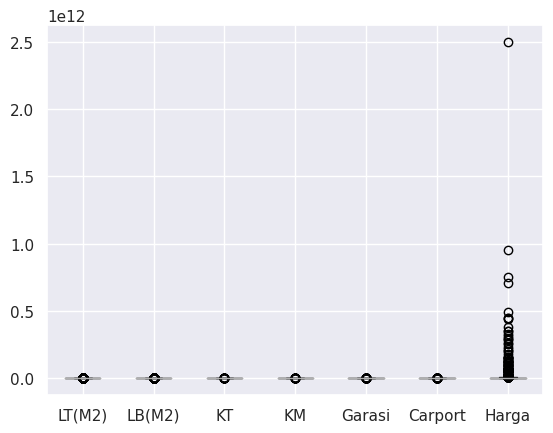

In [ ]:
#Akan di cek outlier
df.boxplot()

<Axes: >

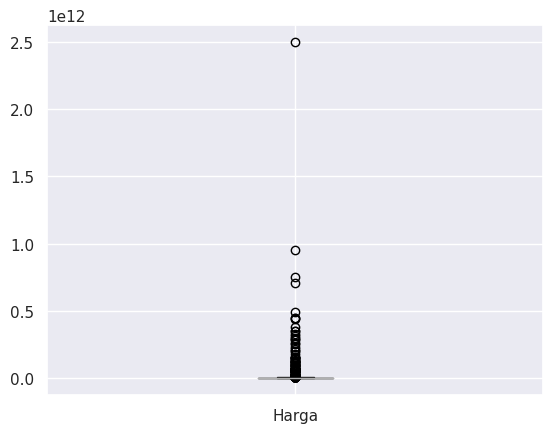

In [ ]:
df.boxplot(column='Harga')

In [ ]:
print(np.where(df['Harga']>1000000000000))

(array([1538]),)


In [ ]:
df.iloc[1538,11]

'https://www.rumah123.com/properti/semarapura/hos12342924/'

In [ ]:
df.iloc[1538,10]=2500000000

In [ ]:
print(np.where(df['Harga']>500000000000))

(array([1786, 1793, 1796]),)


In [ ]:
df.iloc[1786,11]

'https://wwwrumah123com/properti/manado/hos11284976/'

In [ ]:
df.iloc[1786,10]=7990000000

In [ ]:
df.iloc[1793,11]

'https://wwwrumahcom/listing-properti/dijual-citraland-makassar-oleh-samsul-21843357'

In [ ]:
df.iloc[1793,10]=7100000000

In [ ]:
df.iloc[1796,11]

'https://wwwrumahcom/listing-properti/dijual-the-mutiara-makassar-oleh-adi-sungkono-21633149'

In [ ]:
df.iloc[1796,10]=3750000000

<Axes: >

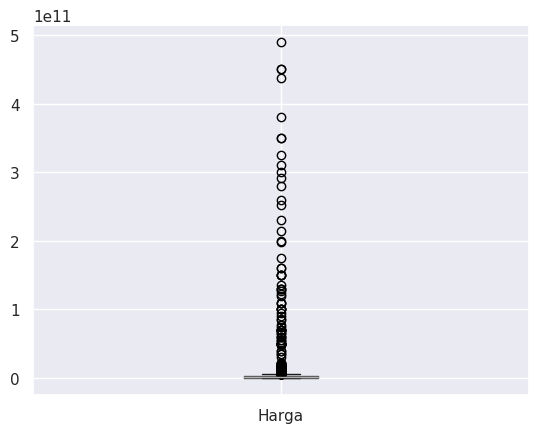

In [ ]:
df.boxplot(column='Harga')

<Axes: >

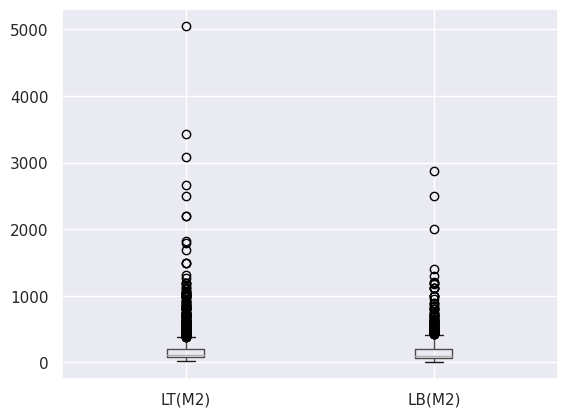

In [ ]:
df.boxplot(column=['LT(M2)','LB(M2)'])

In [ ]:
print(np.where(df['LT(M2)']>5000))

(array([1524]),)


In [ ]:
df.iloc[1524,11]

'https://www.rumah.com/listing-properti/dijual-villa-strawbery-bangli-oleh-putra-20812057'

In [ ]:
df.iloc[1524,1]=5050

In [ ]:
print(np.where(df['LB(M2)']>2500))

(array([1526]),)


In [ ]:
df.iloc[1526,11]

'https://www.rumah.com/listing-properti/dijual-villa-kintamani-bali-lt-lb-3430-2875-int-l-award-winning-villas-good-for-invesment-oleh-nia-rianto-21235862'

In [ ]:
df.iloc[1526,1]=2875

<Axes: >

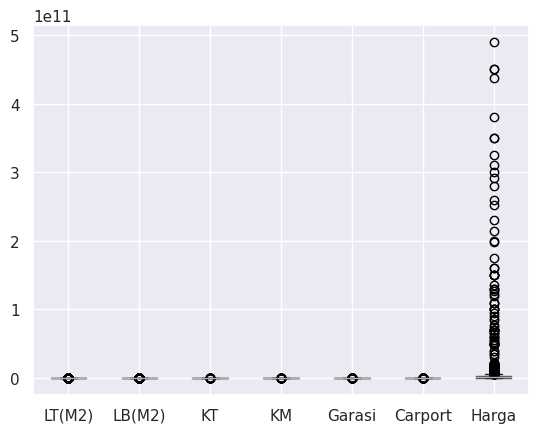

In [ ]:
df.boxplot()

In [ ]:
df.describe()

,LT(M2),LB(M2),KT,KM,Garasi,Carport,Harga
count,1808.000000,1808.000000,1804.000000,1807.000000,1749.000000,1791.000000,1.808000e+03
mean,194.824021,163.849447,3.304878,2.453791,0.674099,1.297599,7.796441e+09
std,270.965452,191.802898,1.771832,2.011304,1.002353,1.069741,3.642491e+10
min,15.000000,7.000000,1.000000,1.000000,0.000000,0.000000,2.200000e+06
25%,80.750000,60.000000,2.000000,1.000000,0.000000,1.000000,6.000000e+08
50%,115.000000,100.000000,3.000000,2.000000,0.000000,1.000000,1.160000e+09
75%,200.000000,200.000000,4.000000,3.000000,1.000000,2.000000,2.485000e+09
max,5050.000000,2875.000000,28.000000,43.000000,10.000000,10.000000,4.900000e+11


In [ ]:
#Save data preprocessing untuk visualisasi data
nama_file_excel = 'PreprocessingDataProperty[FIX].xlsx'
df.to_excel(nama_file_excel, index=False)

Visualisasi Data


---

`Karakteristik Rumah`

In [ ]:
!gdown 1y6QL1ouYtkx3ff6MJCY5krLTwpSy9FgM
prepro = pd.read_excel('PreprocessingDataProperty(Daerah).xlsx')

Downloading...
From: https://drive.google.com/uc?id=1y6QL1ouYtkx3ff6MJCY5krLTwpSy9FgM
To: /content/PreprocessingDataProperty(Daerah).xlsx
100% 160k/160k [00:00<00:00, 83.3MB/s]


In [ ]:
#Membuat visualisasi data Luas Tanah
import plotly.express as px
figLT= px.histogram(prepro, x="LT(M2)")
figLT.show()



> Berdasarkan grafik, data luas tanah memiliki sebaran yang lebih banyak di range 25 M2 s.d.324. Sebaran terbanyak di mana sebanyak 629 rumah memiliki luas tanah yang berkisar di range 75 s.d.124 M2.



In [ ]:
#Membuat visualisasi data Luas Bangunan
figLB = px.histogram(prepro, x="LB(M2)")
figLB.show()



> Berdasarkan grafik, data luas bangunan memiliki sebaran yang lebih banyak di range 25 s.d.219 M2. Sebaran terbanyak di mana sebanyak 284 rumah memiliki luas tanah yang berkisar di range 40 s.d.59 M2.



In [ ]:
#Membuat visualisasi data jumlah Kamar Tidur
figKT = px.histogram(prepro, x="KT")
figKT.show()



> Berdasarkan grafik, data jumlah kamar tidur memiliki sebaran yang lebih banyak di range 1 s.d. 5 kamar. Sebaran terbanyak di mana sebanyak 635 rumah memiliki luas tanah yang memiliki 2 kamar tidur.



In [ ]:
#Membuat visualisasi data jumlah Kamar Mandi
figKM = px.histogram(prepro, x="KM")
figKM.show()



> Berdasarkan grafik, data jumlah kamar mandi memiliki sebaran yang lebih banyak di range 1 s.d. 2 kamar. Sebaran terbanyak di mana sebanyak 635 rumah memiliki luas tanah yang memiliki 2 kamar mandi.



In [ ]:
#Membuat visualisasi data jumlah Garasi
figGar = px.histogram(prepro, x="Garasi")
figGar.show()



>





> Berdasarkan grafik, data jumlah garasi terbanyak ada di 0 garasi, yaitu sebanyak 941 rumah.



In [ ]:
#Membuat visualisasi data jumlah Carport
figCar = px.histogram(prepro, x="Carport")
figCar.show()



> Berdasarkan grafik, data jumlah carport terbanyak ada di 1 carport, yaitu sebanyak 1.153 rumah.



In [ ]:
#Membuat visualisasi data Sertifikat
figST = px.histogram(prepro, x="Sertifikat")
figST.show()



> Berdasarkan grafik, data bentuk sertifikat rumah terbanyak ada di jenis sertifikat SHM. Sebanyak 1.616 rumah memiliki sertifikat SHM.



In [ ]:
#Membuat visualisasi data Listrik
figLis = px.histogram(prepro, x="Listrik")
figLis.show()



> Berdasarkan grafik, data besar daya listrik rumah memiliki sebaran di range 1.000 s.d. 2.490 watt. Di mana 653 rumah memiliki daya listrik di range 1.000 s.d. 1.490 watt.



Visualisasi Data


---



```
Perbandingan Harga Rumah
```



In [ ]:
#Membuat visualisasi data perbandingan harga rumah di setiap lokasi
import plotly.express as px
lokhar = px.box(prepro, x="Daerah", y="Harga", color='Daerah')
lokhar.show()

# Exploratory Data Analysis

In [ ]:
eda = pd.read_excel('PreprocessingDataProperty[FIX].xlsx')
eda

,Created_at,LT(M2),LB(M2),KT,KM,Garasi,Carport,Lokasi,Sertifikat,Listrik,Harga,URL
0,2021-03-12 00:00:00,75.0,38.0,2.0,1.0,1.0,1.0,Bojonggede,SHM,1300,692550000,https://rumahdijual.com/bekasi/10799791-rumah-...
1,2021-06-12 00:00:00,60.0,40.0,1.0,1.0,0.0,1.0,Babakan Madang,SHM,2200,811400000,https://www.rumah123.com/perumahan-baru/proper...
2,2021-06-12 00:00:00,60.0,50.0,2.0,2.0,0.0,1.0,Babakan Madang,SHM,2200,900500000,https://www.rumah123.com/perumahan-baru/proper...
3,2021-06-12 00:00:00,60.0,70.0,3.0,2.0,0.0,1.0,Babakan Madang,SHM,2200,1001900000,https://www.rumah123.com/perumahan-baru/proper...
4,2021-06-12 00:00:00,90.0,60.0,3.0,2.0,0.0,2.0,Babakan Madang,SHM,2200,1200800000,https://www.rumah123.com/perumahan-baru/proper...
...,...,...,...,...,...,...,...,...,...,...,...,...
1803,19-09-2023,1030.0,467.0,2.0,1.0,0.0,1.0,"Malalayang, Manado",SHM,NaN,230000000000,https://www99co/id/properti/rumah-dijual-2mily...
1804,18-09-2023,96.0,96.0,2.0,1.0,0.0,1.0,"Tanjung Bunga, Makassar, Sulawesi Selatan",SHM,3500,67500000000,https://wwwrumahcom/listing-properti/dijual-ru...
1805,17-09-2023,115.0,45.0,2.0,1.0,0.0,1.0,"Palu Selatan, Palu, Sulawesi Tengah",SHM,1300,34800000000,https://wwwrumahcom/listing-properti/dijual-di...
1806,14-09-2023,102.0,72.0,2.0,1.0,0.0,1.0,"Puuwatu, Kendari Sulawesi Tenggara",SHGB,900,17500000000,https://www99co/id/properti/rumah-dijual-175jt...


In [ ]:
#Hubungan antara harga dan fitur rumah per daerah
#Semua Daerah
corr1 = eda['Harga'].corr(eda['LT(M2)'])
print(f"Korelasi antara Harga dan Luas Tanah: {corr1}")
corr2 = eda['Harga'].corr(eda['LB(M2)'])
print(f"Korelasi antara Harga dan Luas Bangunan: {corr2}")
corr3 = eda['Harga'].corr(eda['KT'])
print(f"Korelasi antara Harga dan Kamar Tidur: {corr3}")
corr4 = eda['Harga'].corr(eda['KM'])
print(f"Korelasi antara Harga dan Kamar Mandi: {corr4}")
corr5 = eda['Harga'].corr(eda['Garasi'])
print(f"Korelasi antara Harga dan Garasi: {corr5}")
corr6 = eda['Harga'].corr(eda['Carport'])
print(f"Korelasi antara Harga dan Carport: {corr6}")

Korelasi antara Harga dan Luas Tanah: 0.11781706944526055
Korelasi antara Harga dan Luas Bangunan: 0.15761432228808947
Korelasi antara Harga dan Kamar Tidur: 0.11574635415773873
Korelasi antara Harga dan Kamar Mandi: 0.12173527055551434
Korelasi antara Harga dan Garasi: 0.05639994214024889
Korelasi antara Harga dan Carport: 0.10303193842889477


Dengan nilai korelasi <0.2 maka tidak ada korelasi yang signifikan antara fitur-fitur rumah terhadap harga di setiap daerah pada data.

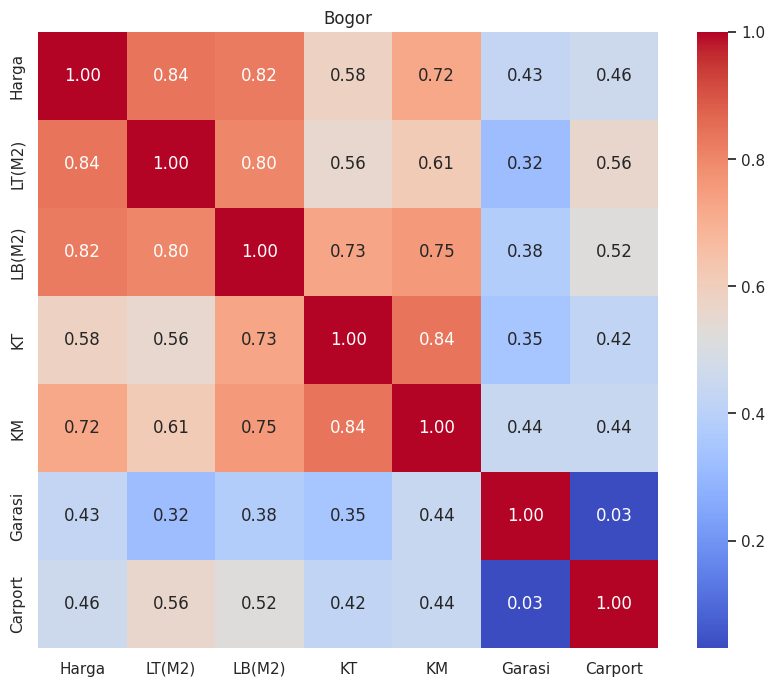

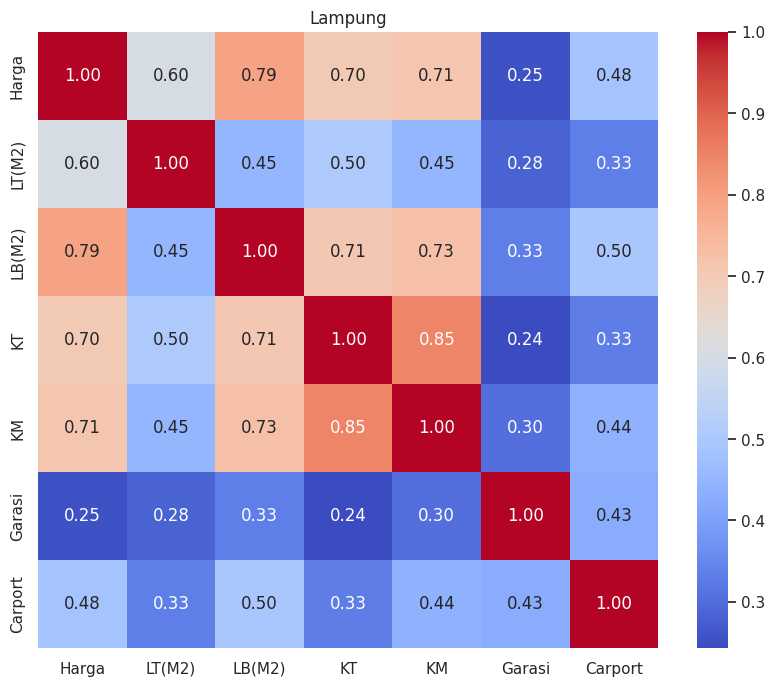

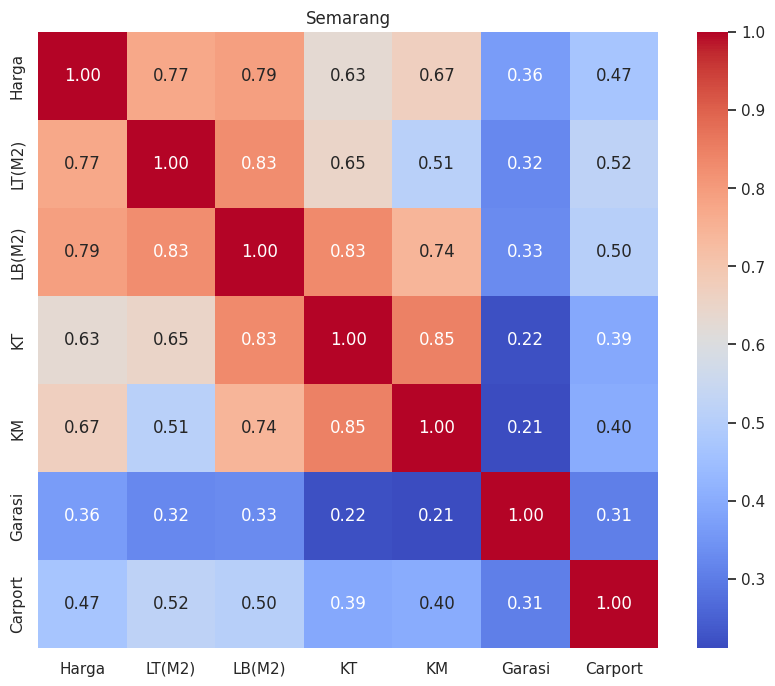

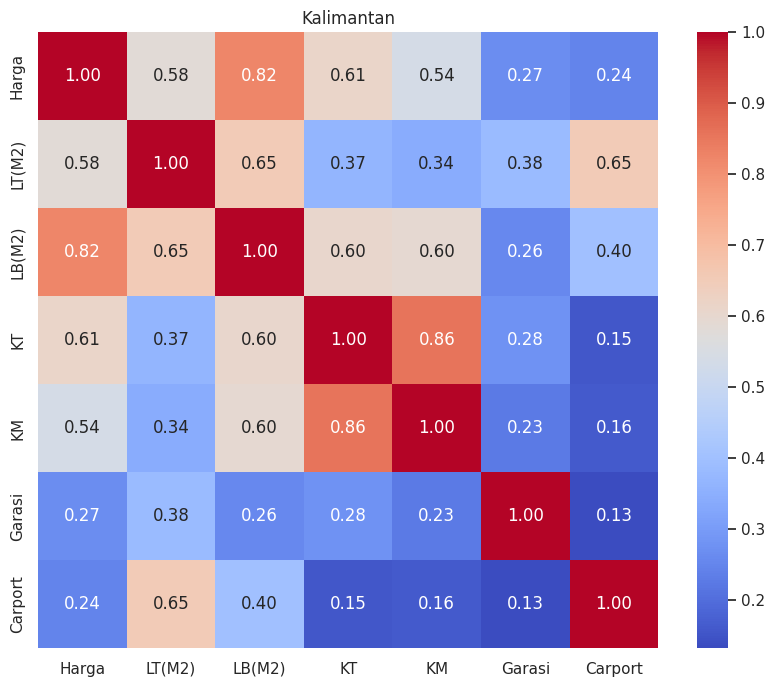

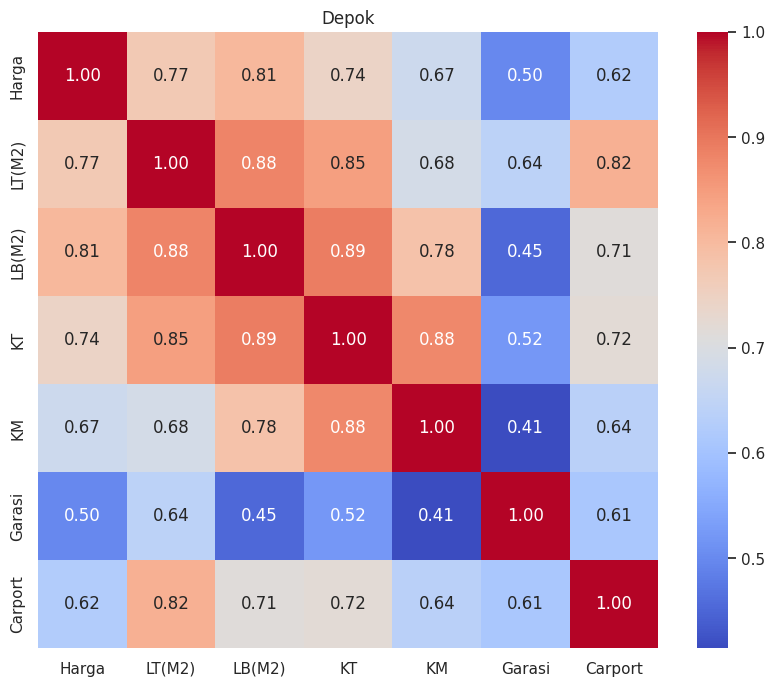

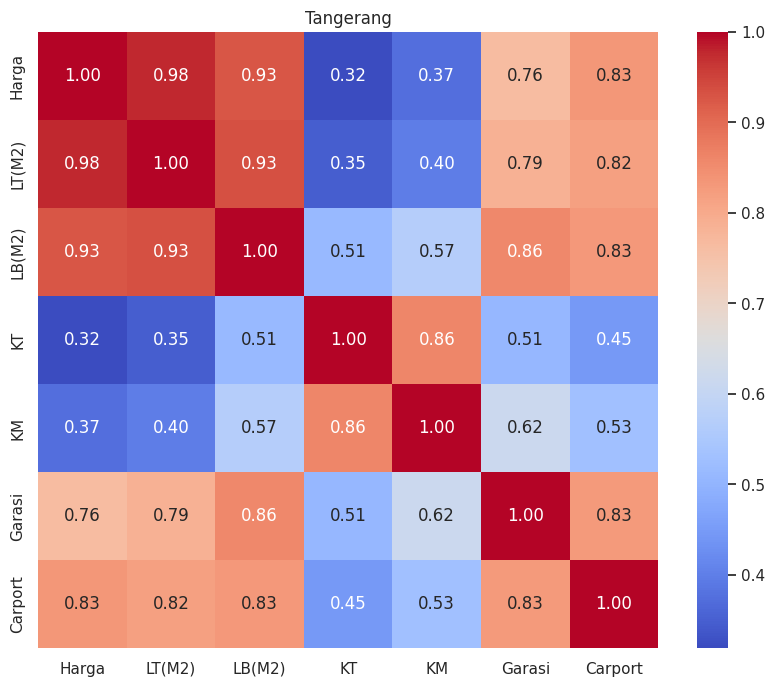

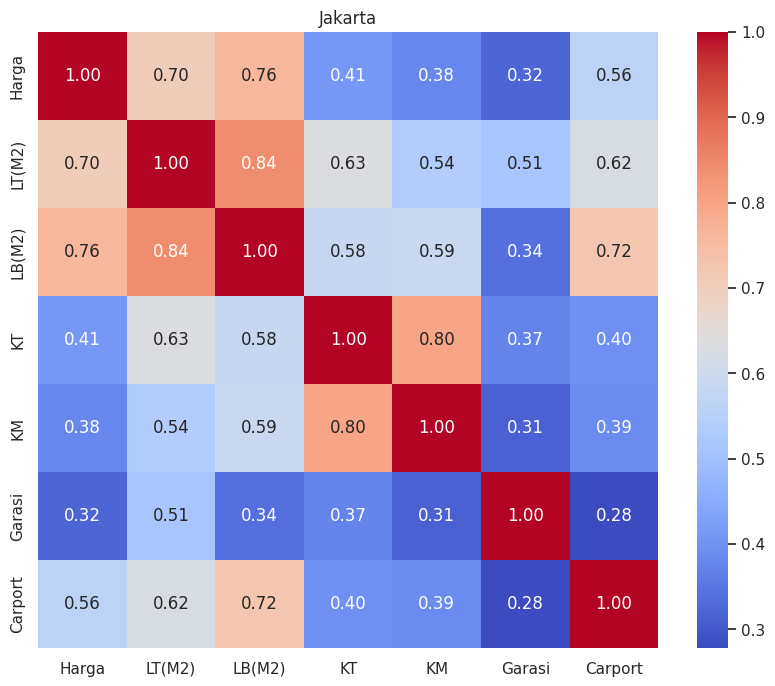

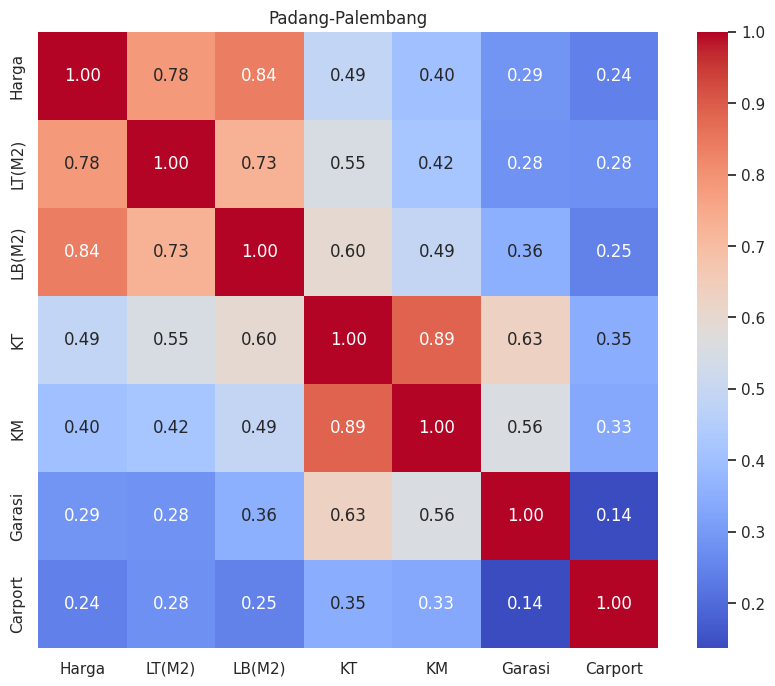

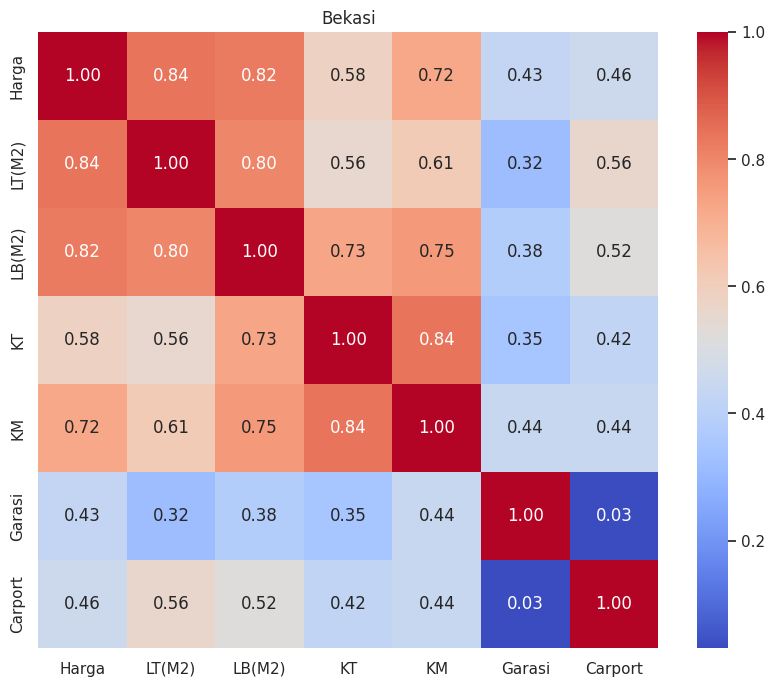

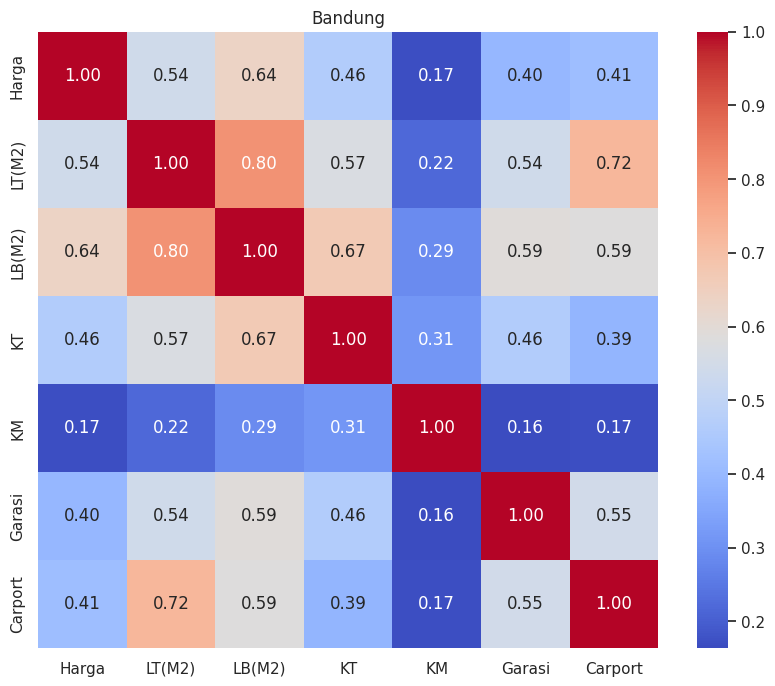

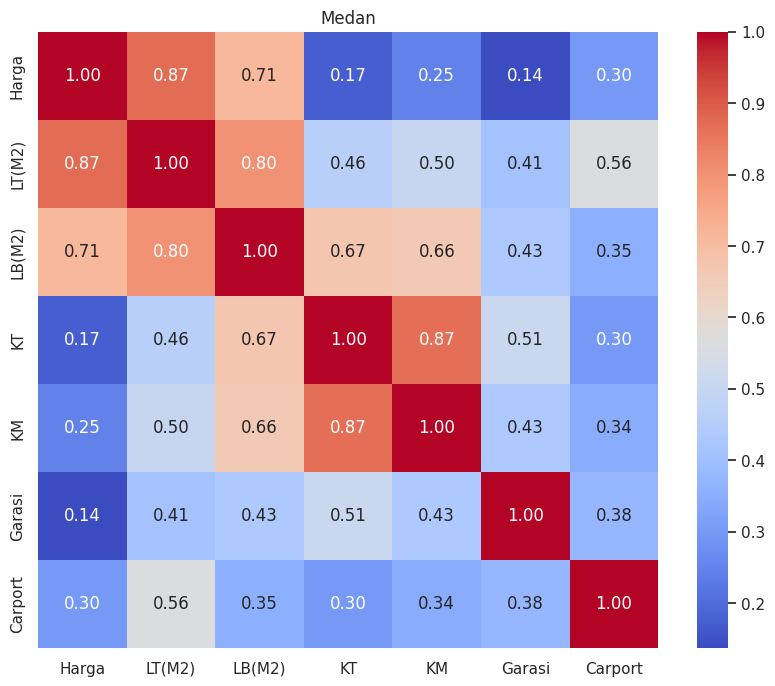

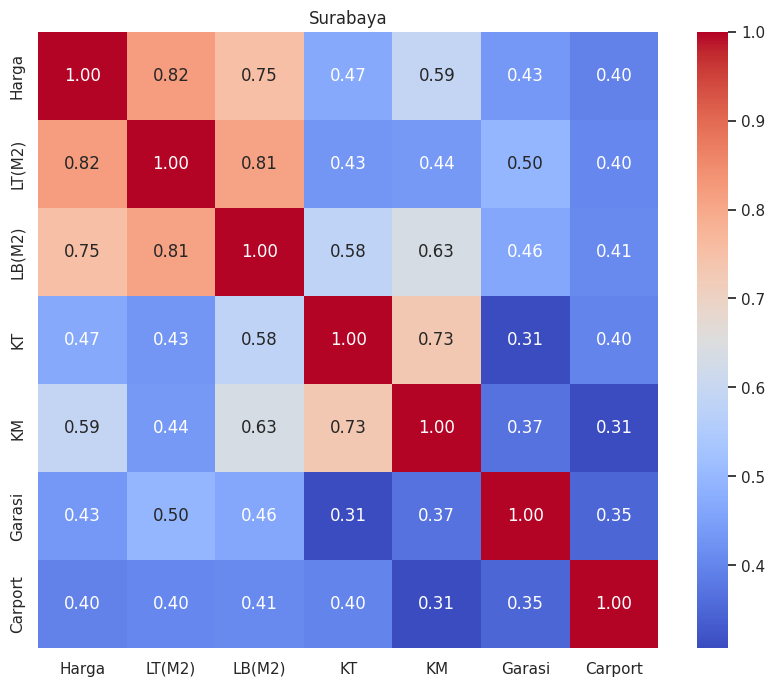

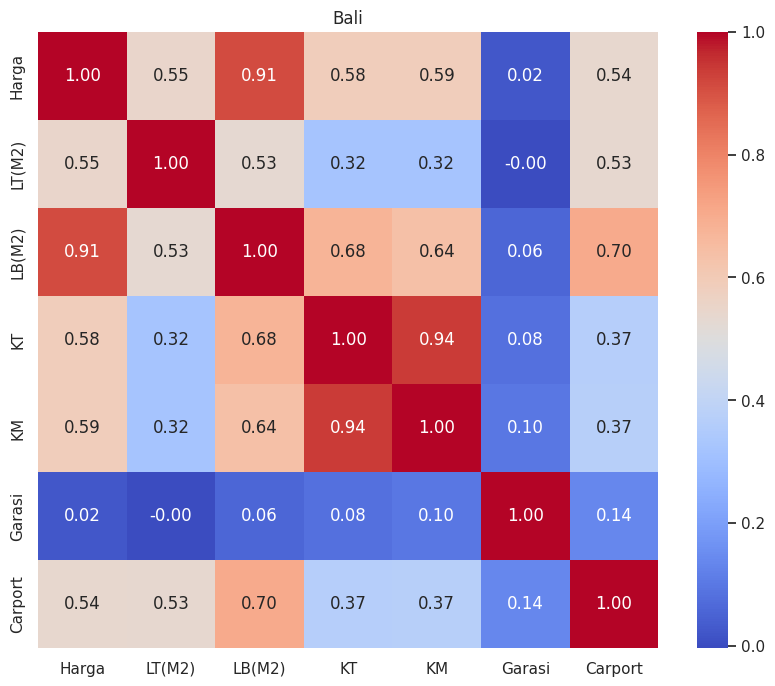

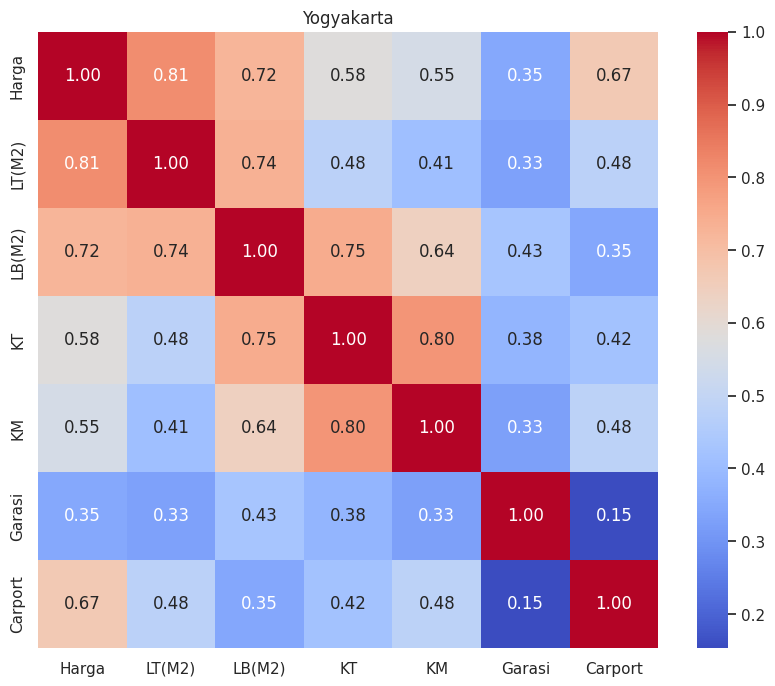

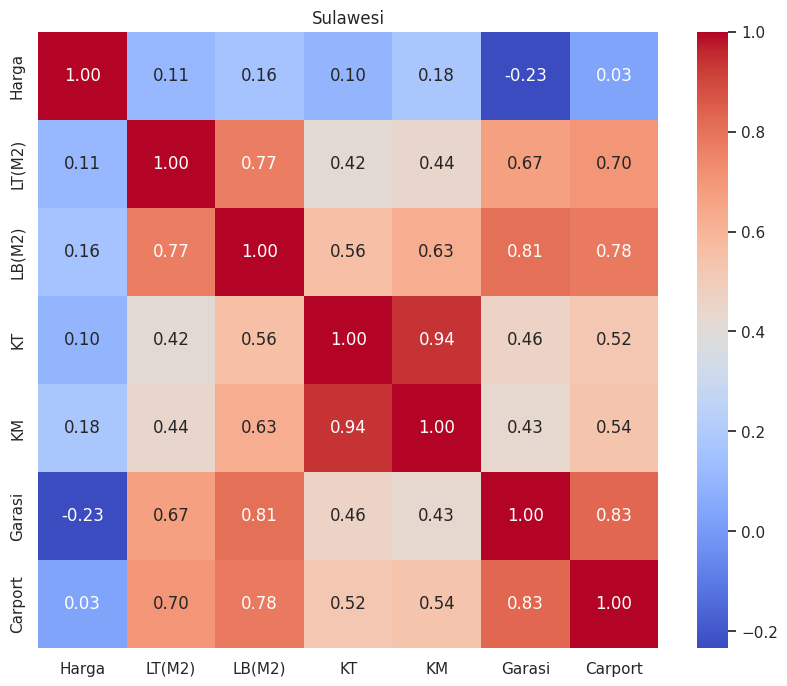

In [ ]:
#hubungan antara harga dan fitur rumah per daerah
#Bogor
df_pdb = prepro[prepro['Daerah'] =='Bogor']
kol = ['Harga', 'LT(M2)', 'LB(M2)', 'KT', 'KM', 'Garasi', 'Carport']
korelasi = df_pdb[kol].corr()
plt.figure(figsize=(10, 8))
plt.title('Bogor')
sns.heatmap(korelasi, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

#Lampung
df_pdl = prepro[prepro['Daerah'] =='Lampung']
korelasi = df_pdl[kol].corr()
plt.figure(figsize=(10, 8))
plt.title('Lampung')
sns.heatmap(korelasi, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

#Semarang
df_pds = prepro[prepro['Daerah'] =='Semarang']
korelasi = df_pds[kol].corr()
plt.figure(figsize=(10, 8))
plt.title('Semarang')
sns.heatmap(korelasi, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

#Kalimantan
df_pdk = prepro[prepro['Daerah'] =='Kalimantan']
korelasi = df_pdk[kol].corr()
plt.figure(figsize=(10, 8))
plt.title('Kalimantan')
sns.heatmap(korelasi, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

#Depok
df_pdd = prepro[prepro['Daerah'] =='Depok']
korelasi = df_pdd[kol].corr()
plt.figure(figsize=(10, 8))
plt.title('Depok')
sns.heatmap(korelasi, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

#Tangerang
df_pdt = prepro[prepro['Daerah'] =='Tangerang']
korelasi = df_pdt[kol].corr()
plt.figure(figsize=(10, 8))
plt.title('Tangerang')
sns.heatmap(korelasi, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

#Jakarta
df_pdj = prepro[prepro['Daerah'] =='Jakarta']
korelasi = df_pdj[kol].corr()
plt.figure(figsize=(10, 8))
plt.title('Jakarta')
sns.heatmap(korelasi, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

#Padang-Palembang
df_pdp = prepro[prepro['Daerah'] =='Padang-Palembang']
korelasi = df_pdp[kol].corr()
plt.figure(figsize=(10, 8))
plt.title('Padang-Palembang')
sns.heatmap(korelasi, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

#Bekasi
df_pdbk = prepro[prepro['Daerah'] =='Bekasi']
korelasi = df_pdb[kol].corr()
plt.figure(figsize=(10, 8))
plt.title('Bekasi')
sns.heatmap(korelasi, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

#Bandung
df_pdbd = prepro[prepro['Daerah'] =='Bandung']
korelasi = df_pdbd[kol].corr()
plt.figure(figsize=(10, 8))
plt.title('Bandung')
sns.heatmap(korelasi, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

#Medan
df_pdm = prepro[prepro['Daerah'] =='Medan']
korelasi = df_pdm[kol].corr()
plt.figure(figsize=(10, 8))
plt.title('Medan')
sns.heatmap(korelasi, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

#Surabaya
df_pdsb = prepro[prepro['Daerah'] =='Surabaya']
korelasi = df_pdsb[kol].corr()
plt.figure(figsize=(10, 8))
plt.title('Surabaya')
sns.heatmap(korelasi, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

#Bali
df_pdbl = prepro[prepro['Daerah'] =='Bali']
korelasi = df_pdbl[kol].corr()
plt.figure(figsize=(10, 8))
plt.title('Bali')
sns.heatmap(korelasi, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

#Yogyakarta
df_pdy = prepro[prepro['Daerah'] =='Yogyakarta']
korelasi = df_pdy[kol].corr()
plt.figure(figsize=(10, 8))
plt.title('Yogyakarta')
sns.heatmap(korelasi, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

#Sulawesi
df_pdsw = prepro[prepro['Daerah'] =='Sulawesi']
korelasi = df_pdsw[kol].corr()
plt.figure(figsize=(10, 8))
plt.title('Sulawesi')
sns.heatmap(korelasi, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()



*   Terbukti adanya korelasi kuat antara Luas Tanah terhadap Harga rumah di semua kota kecuali Kota Tangerang
*   Terbukti adanya korelasi kuat antara Luas Bangunan terhadap Harga rumah di semua kota
*   Terbukti adanya korelasi kuat antara Kamar Tidur terhadap Harga rumah di semua kota kecuali Kota Bogor, Tangerang, Bandung, Medan, Surabaya, Bali, dan Yogyakarta
*   Terbukti adanya korelasi kuat antara Kamar Mandi terhadap Harga rumah di semua kota kecuali Kota Tangerang, Bandung, Medan, Surabaya, Bali, dan Yogyakarta
*   Terbukti adanya korelasi kuat antara kapasitas Garasi terhadap Harga rumah di Kota Padang-Palembang dan Bandung
*   Terbukti adanya korelasi kuat antara Kapasitas Carport terhadap Harga rumah di Kalimantan, Padang-Palembang, Bekasi, dan Bandung









In [ ]:
#rekomendasi rumah untuk diinvestasikan
df['Profitable'] = eda['LT(M2)'] * eda['LB(M2)'] * eda['KT']*eda['KM'] #diasumsikan properti dengan area yang lebih luas dengan jumlah kamar mandi dan kamar tidur terbanyak paling berpotensi menguntungkan (profitable)
rumah_terbaik = df[df['Profitable'] == df['Profitable'].max()]
print("Rekomendasi Rumah Terbaik untuk Investasi:")
print(rumah_terbaik)

Rekomendasi Rumah Terbaik untuk Investasi:
               Created_at  LT(M2)  LB(M2)   KT   KM  Garasi  Carport  Lokasi  \
1526  2021-12-04 00:00:00   179.0   151.0  3.0  2.0     1.0      1.0  Padang   

     Sertifikat Listrik        Harga  \
1526        SHM    1300  550000000.0   

                                                    URL   Profitable  
1526  https://www.rumah.com/listing-properti/dijual-...  826562500.0  


Rumah paling profitable dengan kriteria luas dan jumlah kamar mandi + kamar tidur terbanyak terletak di Padang dengan situs https://www.rumah.com/listing-properti/dijual-rumah-siap-huni-hook-di-padang-Lokasinya-di-komplek-taruko-1-bypass-oleh-rahmat-suwandi-17052387

In [ ]:
# rekomendasi rumah untuk diinvestasikan
eda['Profitable'] = eda['Harga'] / eda['LT(M2)']
min_profitable = eda['Profitable'].min()  # Harga per meter persegi terkecil
best_option = eda[eda['Profitable'] == min_profitable]

print("Rekomendasi Rumah Terbaik untuk Investasi:")
print(best_option)

Rekomendasi Rumah Terbaik untuk Investasi:
              Created_at  LT(M2)  LB(M2)   KT   KM  Garasi  Carport  \
916  2023-09-19 00:00:00   380.0   550.0  5.0  5.0     0.0      3.0   

              Lokasi Sertifikat Listrik    Harga  \
916  Jakarta Selatan        SHM   16000  6900000   

                                                   URL    Profitable  
916  https://www.rumah.com/listing-properti/dijual-...  18157.894737  


Rumah paling profitable dengan kriteria harga/m^2 terendah terletak di Kota Jakarta Selatan dengan situs https://www.rumah.com/listing-properti/dijual-for-sale-rumah-villa-bali-style-cirendeu-dekat-lebak-bulus-jakarta-selatan-oleh-donny-baheramsyah-22191003

Namun, sepertinya terdapat kesalahan peng-*input*-an data karena tidak mungkin sebuah rumah dengan luas tanah 380 m2 dan luas bangunan 550 m2 memiliki harga Rp6.9juta

In [ ]:
#rekomendasi rumah dengan investasi maksimum 25 miliar

inv = eda[eda['Harga'] <= 25000000000]

inv['Harga per m^2 Tanah'] = eda['Harga'] / eda['LT(M2)'] # Hitung harga per meter persegi luas tanah dan luas bangunan
inv['Harga per m^2 Bangunan'] = eda['Harga'] / eda['LB(M2)']
prepro['Total Investasi'] = inv['Harga per m^2 Tanah']+inv['Harga per m^2 Bangunan']# Gabungkan kedua nilai metrik investasi untuk mendapatkan nilai total
pp_sorted = prepro.sort_values(by='Total Investasi', ascending=True)# Urutkan rumah berdasarkan total investasi secara menaik
rekomendasi_rumah = pp_sorted.iloc[0] # Ambil rekomendasi rumah dengan investasi terendah
print(f"Rekomendasi Rumah:") # Tampilkan rekomendasi rumah
print(f"Link: {rekomendasi_rumah['URL']}")
print(f"Lokasi: {rekomendasi_rumah['Lokasi']}")
print(f"Harga: {rekomendasi_rumah['Harga']}")
print(f"Luas Tanah: {rekomendasi_rumah['LT(M2)']}")
print(f"Luas Bangunan: {rekomendasi_rumah['LB(M2)']}")
print(f"Jumlah Kamar Tidur: {rekomendasi_rumah['KT']}")
print(f"Jumlah Kamar Mandi: {rekomendasi_rumah['KM']}")
print(f"Kapasitas Garasi: {rekomendasi_rumah['Garasi']}")
print(f"Kapasitas Carport: {rekomendasi_rumah['Carport']}")
print(f"Daya Listrik: {rekomendasi_rumah['Listrik']}")
print(f"Sertifikat: {rekomendasi_rumah['Sertifikat']}")

Rekomendasi Rumah:
Link: https://www.rumah.com/listing-properti/dijual-for-sale-rumah-villa-bali-style-cirendeu-dekat-lebak-bulus-jakarta-selatan-oleh-donny-baheramsyah-22191003
Lokasi: Jakarta Selatan
Harga: 6900000
Luas Tanah: 380.0
Luas Bangunan: 550.0
Jumlah Kamar Tidur: 5.0
Jumlah Kamar Mandi: 5.0
Kapasitas Garasi: 0.0
Kapasitas Carport: 3.0
Daya Listrik: 16000
Sertifikat: SHM


Rumah dengan peluang investasi (max 25 miliar) terbaik berdasarkan harga/m^2 terbaik terletak di Jakarta Selatan (sama dengan hasil sebelumnya). Hal ini berarti jawaban ini tidak begitu tepat karena kekeliruan data.

In [ ]:
#Analisis harga/m^2
df['Harga per m2'] = eda['Harga'] / eda['LT(M2)']

mean_harga_per_m2 = df['Harga per m2'].mean() # Statistik Deskriptif
median_harga_per_m2 = df['Harga per m2'].median()
max_harga_per_m2 = df['Harga per m2'].max()
min_harga_per_m2 = df['Harga per m2'].min()
print(f"Mean Harga per m2: {mean_harga_per_m2:}")
print(f"Median Harga per m2: {median_harga_per_m2:}")
print(f"Maximum Harga per m2: {max_harga_per_m2:}")
print(f"Minimum Harga per m2: {min_harga_per_m2:}")


Mean Harga per m2: 34405138.56971618
Median Harga per m2: 9234000.0
Maximum Harga per m2: 3781512605.042017
Minimum Harga per m2: 18157.894736842107


## Insight

Jawaban objektif

**1. Kualitas Data yang dimiliki perusahaan**

Secara umum, data dapat di lihat pada proses sebelumnya, yaitu *pre-processing*.

*   Data memiliki banyak *missing values*
dengan terbanyak terdapat pada variabel Garasi (1054), Carport (557), Listrik(226), Hadap (1666). Artinya, dalam kolom tersebut, masih terdapat banyak beberapa penjual properti di Indonesia yang tidak mencantumkan detail rumah pada situs mereka.
*   Terdapat duplikasi data sebanyak 20 entri nilai.
*   Pada proses *outliers*, dilakukan validasi keaslian URL terhadap data yang digunakan sehingga data sudah valid.

Dengan berbagai proses yang telah dilakukan, dapat terlihat bahwa kualitas data apabila di lihat secara *raw* tanpa *preprocessing*, masih belum memiliki kualitas yang baik.



**2. Beberapa saran perbaikan data ke DE/DBA perusahaan agar RPPI menjadi data driven company yang unggul.**

Melalui rangkaian *pre-processing*, visualisasi, dan EDA. Terlihat bahwa dibutuhkan beberapa data tambahan agar dapat meningkatkan keakuratan pemilihan investasi seperti.


*   Property-demand di area sekitar rumah/bangunan tersebut
*   data biaya operasional setiap daerah (pajak, listrik, air, UMR, dll)
*   Ketersediaan fasilitas umum di sekitar rumah/bangunan tersebut

Sehingga untuk sementara ini, penilaian potensi keuntungan investasi hanya dapat dinilai dari harga/m^2 terendah.





**3. Kecenderungan rumah disuatu kota lebih mahal/murah dibandingkan kota lain**

Dapat dilihat dari visualisasi perbandingan harga rumah di setiap lokasi bahwa terdapat kecenderungan tinggi rendahnya harga rumah di daerah tertentu. Seperti :
1. Cenderung rendahnya nilai rumah di Kalimantan, Padang-Palembang, Bekasi, dan
Medan dibandingkan dengan nilai rumah Sulawesi, Jakarta, Bandung, dan Bali.
2. Lokasi dengan harga rumah terendah berada pada **Kota Bekasi** dengan maksimal harga 5.5miliar
3. Lokasi dengan harga rumah tertinggi berada pada Pulau Kalimantan dengan maksimal harga 490miliar

**4. Rekomendasi kantor cabang berikut RPPI**

Dari data yang diberikan, tidak dapat diketahui secara pasti dimana letak kantor cabang berikutnya yang terbaik. Seperti pada poin 2, dibutuhkan data *property-demand* setiap daerah untuk mengetahui lokasi dengan permintaan tertinggi. Dibutuhkan juga data biaya operasional setiap daerah untuk mengkalkulasi ROI terbaik dari setiap daerah.

**5. Karakteristik rumah yang terbanyak dijual**

Berdasarkan hasil visualisasi data, karakteristik rumah yang terbanyak dijual adalah rumah dengan kriteria berikut.


*   Luas Tanah berkisar antara 75-124 m2
*   Luas Bangunan berkisar antara 40-59 m2
*   Jumlah Kamar Tidur 2
*   Jumlah Kamar Mandi 2
*   Tidak bergarasi
*   Kapasitas Carport 1
*   Sertifikat rumah SHM
*   Daya Listrik 1000-1490W





**6. Rekomendasi rumah yang berpotensi menghasilkan keuntungan bagi perusahaan dengan maksimum investasi 25miliar**

Dengan menggunakan *code* pada EDA diatas, didapatkan rumah yang paling profitable untuk investasi berdasarkan nilai harga/m^2 terendah. Yaitu rumah yang terletak pada Jakarta Selatan dengan LT 380m2 dan LB 550m2, 5 Kamar Tidur, 5 Kamar Mandi, Daya Listrik 16000W, 3 Kapasitas Carport, dan sertifikat SHM. Dan pastinya rumah tersebut berharga dibawah 25 miliar.

**7. Additional Insights**
*  Adanya korelasi positif antara fitur-fitur rumah dengan harga rumah. Namun, korelasi fitur-fitur rumah ini berbeda berdasarkan lokasinya. Misalnya, terdapat korelasi antara LT, LB, KT, dan KM terhadap Harga di Kota Bogor. Sedangkan, hanya terdapat korelasi antara LT dan LB dengan Harga di Kota Bandung.
*  Adanya korelasi rendah antara Garasi dan Carport terhadap Harga di semua kota kecuali Padang-Palembang, Bekasi, dan Bandung
*  Tidak adanya korelasi kuat antara semua data dengan Harga di Sulawesi
*  Tidak boleh dilakukan uji korelasi secara bersamaan dari seluruh daerah karena standar pemasangan harga yang berbeda tiap daerah. Hal ini menyebabkan tidak terlihatnya korelasi antara setiap variabel dengan harga rumah.
*  Harga-harga rumah cenderung rendah di Kalimantan, Padang-Palembang, Bekasi
*  Harga rumah cenderung tinggi di Sulawesi, Jakarta, Bandung, dan Bali.
*  Rata-rata harga per m2 adalah sebesar Rp34.405.138,57
*  Median harga per m2 adalah sebesar Rp9.234.000,00
*  Maksimum harga per m2 adalah sebesar Rp3.781.512.605,04
*  Minimum harga per m2 adalah sebesar Rp18.157,89
